- dot product varies based on the angle between two vectors => Specifically, the dot product u ∙ v ranges  `[-1 * (|u| * |v|), (|u| * |v|)]` as angle ranges from 0 to 180°. 
- We already saw a function that behaves that way, namely the cosine function (ratio change in length for change in x). 
- It turns out that the dot product has an alternate formula. the dot product is given by `u ∙ v = |u| ∙ |v| ∙ cos(θ)`
  - where θ is the angle between the vectors u and v.

In [1]:
import sys
sys.path.insert(0,'..')
import numpy as np
from vectors import *;
from draw3d import *;
from draw2d import *;
from math import *

lengte_b = 3.605551275463989, hoek_b = 0.982793723247329
lengte_a = 4.47213595499958, hoek_a = 0.4636476090008061
angle_a_to_b = 0.519146114246523
projectie_vector = [2.8, 1.4], projectie_lengte = 3.1304951684997055
dot_product_coords_via_projection = [12.521980673998822, 6.260990336999411], dot_product_via_projection = 14.0
dot_product_coords_via_formula = [12.521980673998822, 6.260990336999411], dot_product_via_formula = 14


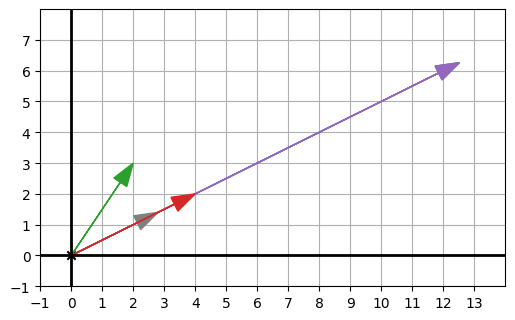

In [2]:
# dot product equals the sum of the products of point coordinates
def dot(u,v):
    return sum([coord1 * coord2 for coord1,coord2 in zip(u,v)])

def length(v):
    return sqrt(v[0]**2 + v[1]**2)

def to_polar(vector, inRadians = True):
    x = vector[0]
    y = vector[1]
    angle = atan2(y,x) if inRadians else degrees(atan2(y,x))
    return (length(vector), angle)

def to_cartesian(v, inRadians = True):
    (length, degrees) = v
    deg = degrees if inRadians else radians(degrees)
    return (length * cos(deg), length * sin(deg))


# 'when offered two vectors we can find the dot product via two approaches
A = (4,2)
B = (2,3)


# 1 : find the length of A and find the length of the projection of B on A
# then multiply these lengths
(lengte_a, hoek_a) = to_polar(A)

# now we need to find the length of the projection itself
(lengte_b, hoek_b) = to_polar(B)
angle_a_to_b = hoek_b - hoek_a
# cos(angle_a_to_b) = projectie_lengte / lengte_b
projectie_lengte = cos(angle_a_to_b) * lengte_b
projectie_vector = to_cartesian((projectie_lengte,hoek_a))
dot_product_via_projection = projectie_lengte * lengte_a
dot_product_coords_via_projection = to_cartesian((dot_product_via_projection, hoek_a))

print(f'lengte_b = {lengte_b}, hoek_b = {hoek_b}')
print(f'lengte_a = {lengte_a}, hoek_a = {hoek_a}')
print(f'angle_a_to_b = {angle_a_to_b}')
print(f'projectie_vector = {list(projectie_vector)}, projectie_lengte = {projectie_lengte}')


# 2 : we know
dot_product_via_formula = dot(A,B)
dot_product_coords_via_formula= to_cartesian((dot_product_via_formula, hoek_a))

print(f'dot_product_coords_via_projection = {list(dot_product_coords_via_projection)}, dot_product_via_projection = {dot_product_via_projection}')
print(f'dot_product_coords_via_formula = {list(dot_product_coords_via_formula)}, dot_product_via_formula = {dot_product_via_formula}')

draw2d(
    Arrow2D(*[projectie_vector], color = gray),
    Arrow2D(*[dot_product_coords_via_projection], color = blue),
    Arrow2D(*[dot_product_coords_via_formula], color = purple),
    Arrow2D(*[A]),
    Arrow2D(*[B], color=green),
);